# 0) requirements

In [22]:
# Install required package (if not already installed)

!pip install miditok kagglehub mido


## a) Download dataset
for improvement see : GiantMIDI dataset.

In [23]:

# Step 1: Download the dataset from Kaggle using kagglehub
import kagglehub
dataset_path = kagglehub.dataset_download("pictureinthenoise/music-generation-with-giantmidi-piano")
print("Path to dataset files:", dataset_path)

Path to dataset files: /kaggle/input/music-generation-with-giantmidi-piano


## b) import dependencies

In [24]:
import os
from miditok import REMI
import numpy as np
import IPython.display as ipd
from scipy.io.wavfile import write as wavwrite
import os
import random
import shutil
import mido
import matplotlib.pyplot as plt
import subprocess
from pydub import AudioSegment

# 1) dataset:
sources: bigger with more musics types: https://github.com/asigalov61/Tegridy-MIDI-Dataset


super famous, piano : https://github.com/bytedance/GiantMIDI-Piano. **The one used**



In [25]:
midi_files = []
# Recursively search for files ending with .mid or .midi
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith(('.mid', '.midi')):
            midi_files.append(os.path.join(root, file))

if not midi_files:
    raise ValueError("No MIDI files found in the downloaded dataset.")

print(f"Found {len(midi_files)} MIDI files.")


Found 10845 MIDI files.


In [26]:

# Step 3: Split files into train (80%), validation (10%), and test (10%) sets
random.shuffle(midi_files)
n_total = len(midi_files)
n_train = int(n_total * 0.8)
n_val = int(n_total * 0.1)
# The rest for testing:
n_test = n_total - n_train - n_val

train_files = midi_files[:n_train]
val_files = midi_files[n_train:n_train+n_val]
test_files = midi_files[n_train+n_val:]

# Create directories for the splits
os.makedirs("data/train", exist_ok=True)
os.makedirs("data/val", exist_ok=True)
os.makedirs("data/test", exist_ok=True)

# Copy files into their corresponding directories
for file in train_files:
    shutil.copy(file, "data/train/")
for file in val_files:
    shutil.copy(file, "data/val/")
for file in test_files:
    shutil.copy(file, "data/test/")

print("Dataset has been split into train, validation, and test sets.")


Dataset has been split into train, validation, and test sets.


# 2) playing with dataset + examples

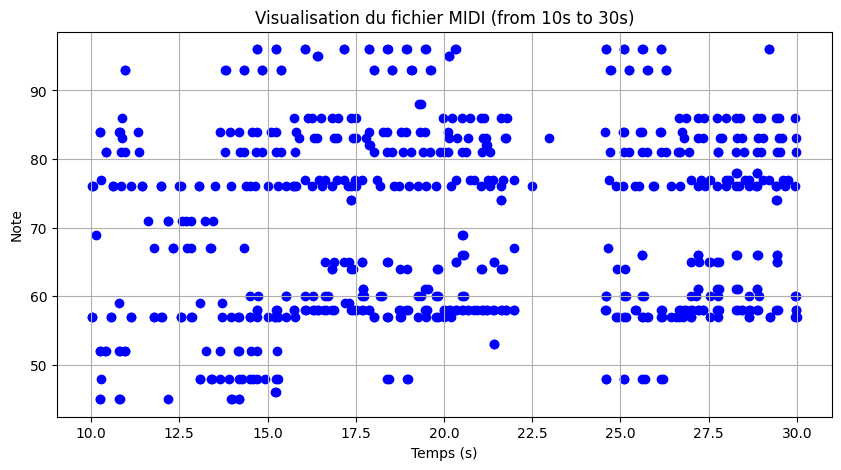

In [27]:
def plot_midi(file_path, start_sec=0, end_sec=None):

    mid = mido.MidiFile(file_path)
    
    notes = []
    times = []
    current_time = 0
    
    # Iterate over all MIDI messages and track cumulative time
    for msg in mid:
        current_time += msg.time
        if msg.type in ['note_on', 'note_off']:
            # Only add notes within the selected time window
            if current_time >= start_sec and (end_sec is None or current_time <= end_sec):
                notes.append(msg.note)
                times.append(current_time)
    
    plt.figure(figsize=(10, 5))
    plt.scatter(times, notes, color='blue', marker='o')
    title_end = f"{end_sec}s" if end_sec is not None else "end"
    plt.title(f'Visualisation du fichier MIDI (from {start_sec}s to {title_end})')
    plt.xlabel('Temps (s)')
    plt.ylabel('Note')
    plt.grid(True)
    plt.show()

# Example usage:
#midi_file = 'data/train/a-jag-je-t-aime-juliette-oxc7fd0zn8o.mid'
# Plot from 10 seconds to 30 seconds of the MIDI file
#plot_midi(midi_file, start_sec=10, end_sec=30)

## Tokenizer:
Pierre bonne intuition REMI bonne idée askip CP mieux pour la classification il met pas mal de point à REMI dans ce papier: https://arxiv.org/pdf/2107.05223

et en même temps dans le cours https://leria.univ-angers.fr/wp-content/uploads/2023/09/Prez-Seminaire-LERIA-2023.pdf ça dit que BPE + Rémi c'eest mieux
comme si CP ça avait pas de BPE possible (à chercher)

In [ ]:
from miditok import REMI, TokenizerConfig
from pathlib import Path

# Create a tokenizer configuration
config = TokenizerConfig(num_velocities=16, use_chords=True, use_programs=True)
tokenizer_remi = REMI(config)

# Path to your MIDI files used to train the tokenizer
files_paths = list(Path("data").rglob("*.mid"))
print("number of files : ",len(files_paths))

# Train the tokenizer using Byte Pair Encoding (BPE) with a vocab size of 20000 
tokenizer.train(vocab_size=20000, files_paths=files_paths)# UNCOMMENT IF NEED TO TRAIN AGAIN


number of files :  10845


/usr/local/lib/python3.10/dist-packages/miditok/tokenizations/remi.py:88: UserWarning: Attribute controls are not compatible with 'config.one_token_stream_for_programs' and multi-vocabulary tokenizers. Disabling them from the config.
  super().__init__(tokenizer_config, params)
